In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

### Назождение скорости звука

In [15]:
data = pd.read_csv("d_by_freq.csv")
L = 795 #длина резонатора в мм
data['sin'] = data['d[mm]'] / L
lamb = 650 # длина волны лазера в нанометрах
data['Lambda'] = 650 / (1e3 * data['sin']) #длина волны в мкм
data['V'] = data['Lambda'] * data['freq[MHz]']

In [16]:
print(f"Скорость звука: {np.mean(data['V']):.2f} +/- {np.std(data['V']):.2f} м/c")

Скорость звука: 3476.34 +/- 65.58 м/c


In [17]:
data

,freq[MHz],d[mm],sin,Lambda,V
0,100,15.0,0.018868,34.450000,3445.000000
1,95,14.0,0.017610,36.910714,3506.517857
2,90,13.0,0.016352,39.750000,3577.500000
3,85,12.5,0.015723,41.340000,3513.900000
4,80,12.0,0.015094,43.062500,3445.000000
5,75,11.5,0.014465,44.934783,3370.108696


### Распределение в максимумах

In [19]:
data = pd.read_csv("raspredelenie_maximumov.csv")
data

,freq,noise,maximum_center,maximum_left,maximum_right,v_del_side,v_del_center
0,57,0.05,0.42,0.27,0.225,0.05,0.1


In [20]:
data['maximum_center'] -= data.noise
data['maximum_left'] -= data.noise
data['maximum_right'] -= data.noise

Центр 0    0.48366
dtype: float64
Левый 0    0.287582
dtype: float64
правый 0    0.228758
dtype: float64


/home/vladimir/.conda/envs/labs/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


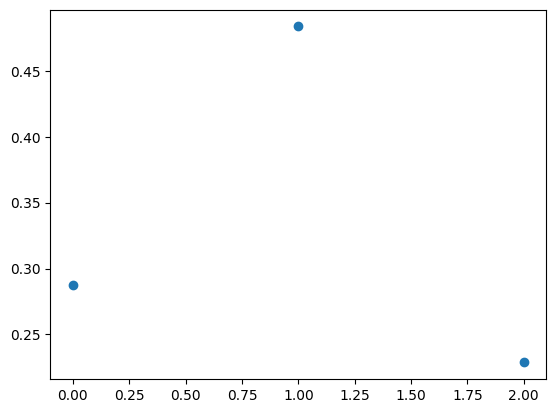

In [24]:
s = data['maximum_center'] + data['maximum_left'] + data['maximum_right']
intens = [data['maximum_left'] / s, data['maximum_center'] / s, data['maximum_right'] / s]
print("Центр", data['maximum_center'] / s)
print("Левый", data['maximum_left'] / s)
print("правый", data['maximum_right'] / s)

plt.scatter(np.arange(3), intens)

### Мощность

In [83]:
data_side = pd.read_csv("side_podgon.csv")
data_side

,I[mkA],amp[V]
0,95.0,0.255
1,85.0,0.240
2,75.0,0.230
3,65.0,0.215
4,55.0,0.170
5,45.0,0.124
6,35.0,0.090
7,7.5,0.032


In [84]:
data_side['amp[V]'] -= 0.02
data_side['amp[V]'] /= (0.42 - 0.02)
P_side = (data_side['I[mkA]'] / 1e3)**2 * 50 
I_side = np.power(data_side['amp[V]'], 2) 


MNK_2 = stats.linregress(P_side, I_side)


x_line = np.linspace(0, 0.5, 1000)

y_line_2 = MNK_2.intercept + MNK_2.slope * x_line


y_line_2_upper = y_line_2 + MNK_2.stderr * x_line + MNK_2.intercept_stderr
y_line_2_lower = y_line_2 - MNK_2.stderr * x_line - MNK_2.intercept_stderr


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_82372/2335140450.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_line, y_line_2, color = 'black', label = f'$y = a x + b$\na = {MNK_2.slope:.2f} $\pm$ {MNK_2.stderr:.2f}\nb = {MNK_2.intercept:.2f} $\pm$ {MNK_2.intercept_stderr:.2f}')
/tmp/ipykernel_82372/2335140450.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x_line, y_line_2, color = 'black', label = f'$y = a x + b$\na = {MNK_2.slope:.2f} $\pm$ {MNK_2.stderr:.2f}\nb = {MNK_2.intercept:.2f} $\pm$ {MNK_2.intercept_stderr:.2f}')


(0.0, 0.5)

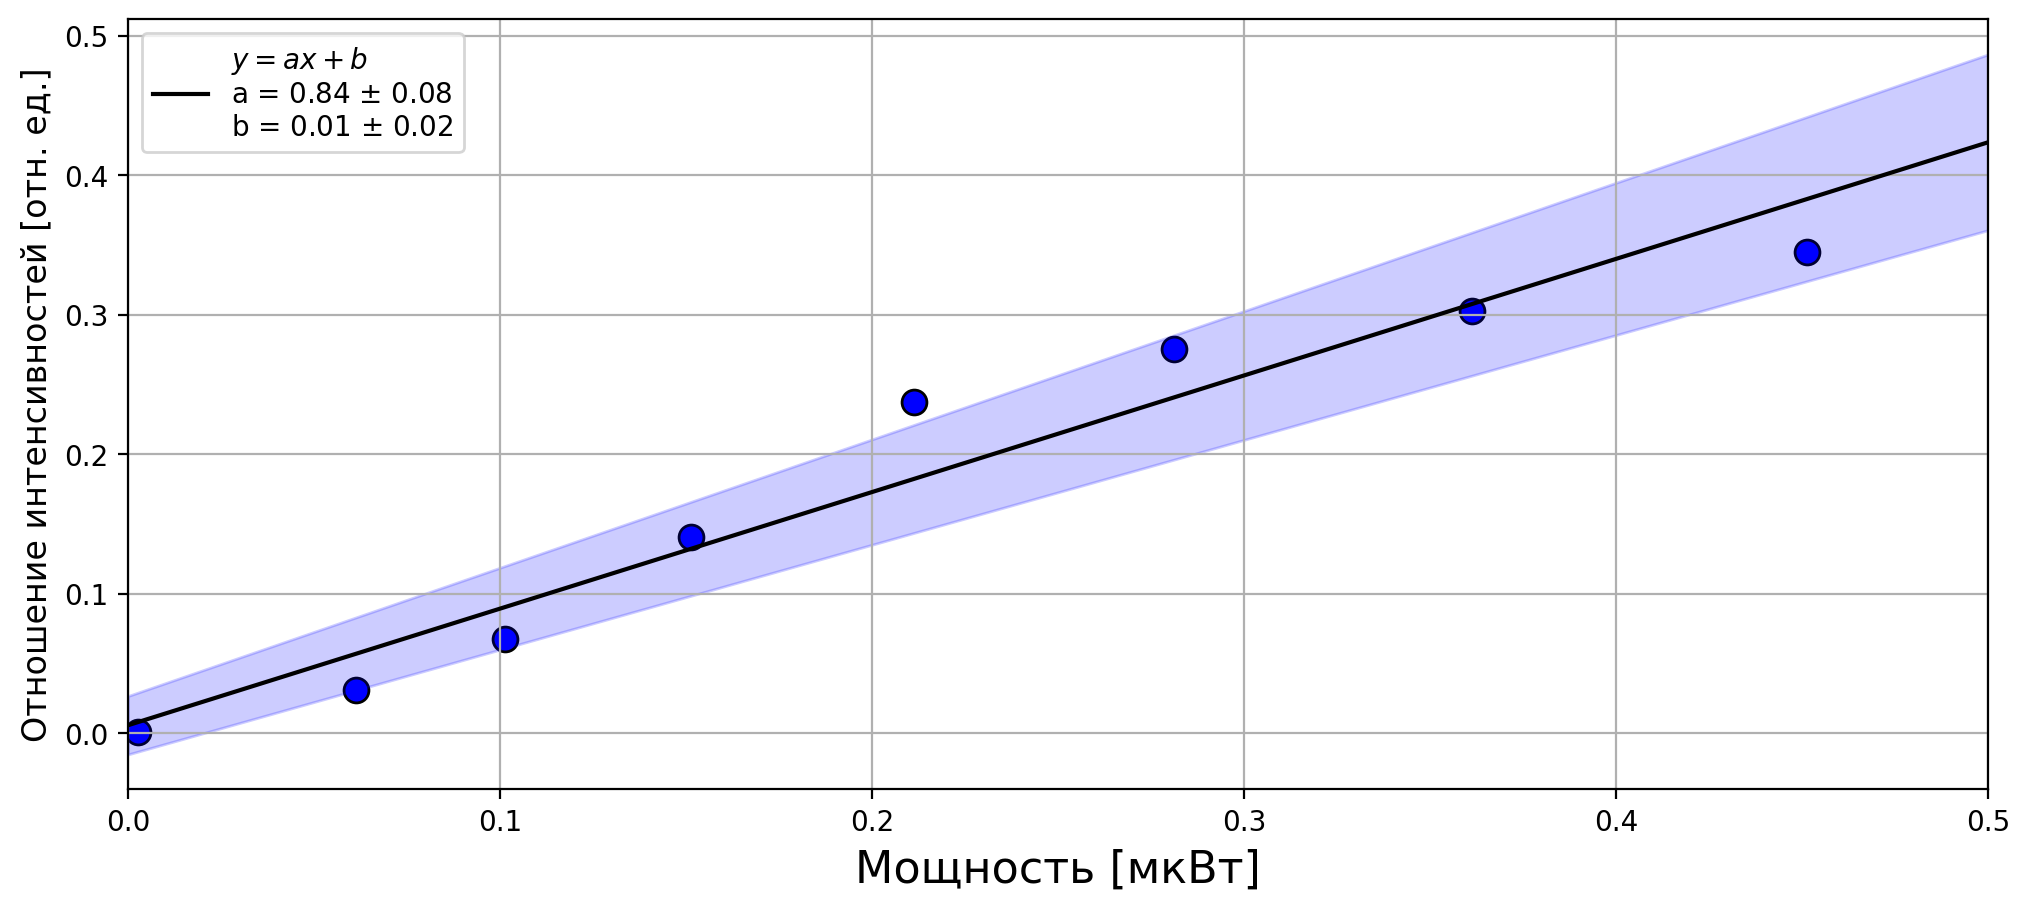

In [90]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(P_side, I_side,s = 80, color = 'blue', edgecolors = 'black')
plt.fill_between(x_line, y_line_2_lower, y_line_2_upper, color="blue", alpha=0.2)
plt.plot(x_line, y_line_2, color = 'black', label = f'$y = a x + b$\na = {MNK_2.slope:.2f} $\pm$ {MNK_2.stderr:.2f}\nb = {MNK_2.intercept:.2f} $\pm$ {MNK_2.intercept_stderr:.2f}')
plt.legend()
plt.xlabel("Мощность [мкВт]", fontsize = 16)
plt.ylabel(r"Отношение интенсивностей [отн. ед.]", fontsize = 12)
plt.grid()
plt.xlim(0, 0.5)